In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from canopywatch.ml_logic.registry import load_local_model, save_model
from canopywatch.interface.linear_model_ops import preprocess, train
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [13]:
X, y = preprocess()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [36]:
pred = linear_model_1.predict(np.expand_dims(X_test[0], axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.8471508]], dtype=float32)

In [30]:
def scatter_predictions(model):
    predictions = model.predict(X_test)
    predictions_flattened = predictions.flatten()

    # Create scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions_flattened, y_test, alpha=0.6, edgecolor='k')
    plt.title("Scatterplot of Predictions vs. True Values")
    plt.xlabel("Predictions")
    plt.ylabel("True Values")

    # Add a diagonal line for reference
    min_val = min(predictions_flattened.min(), y_test.min())
    max_val = max(predictions_flattened.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

In [ ]:
params = {'start_filters': 16, 'kernel_size': 5, 'dropout': 0.2, 'num_blocks': 5, 'optimizer': 'RMSprop', 'batch_size': 32}
params = {'start_filters': 8, 'kernel_size': 5, 'dropout': 0.2, 'num_blocks': 6, 'optimizer': 'RMSprop', 'batch_size': 32}
history, model = train(X_train, y_train, params, 10, params['batch_size'], 1000, 0.15, True)
save_model(model)


In [ ]:
linear_model_1 = load_local_model('linear_model_1.h5')
linear_model_2 = load_local_model('linear_model_2.h5')

✅ Model loaded from local disk
✅ Model loaded from local disk


24/24 [==============================] - 3s 134ms/step


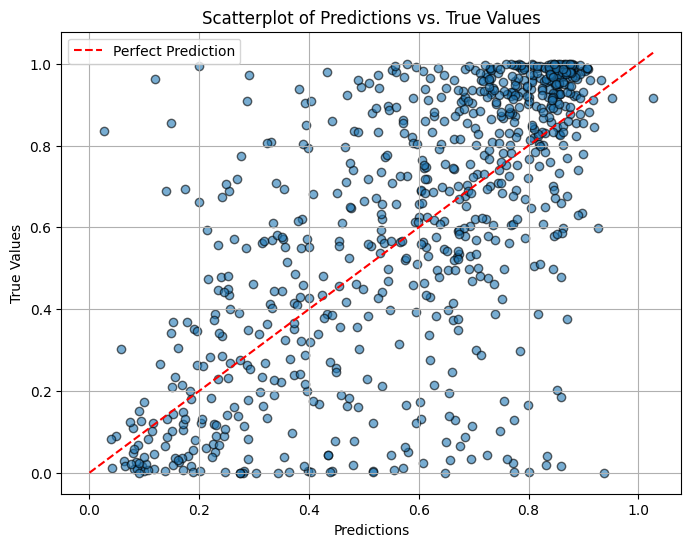

{'loss': 0.05910387635231018, 'mae': 0.1832953542470932}

In [31]:
metrics = linear_model_1.evaluate(x=X_test, y=y_test, return_dict=True)
scatter_predictions(linear_model_1)
metrics

24/24 [==============================] - 2s 71ms/step


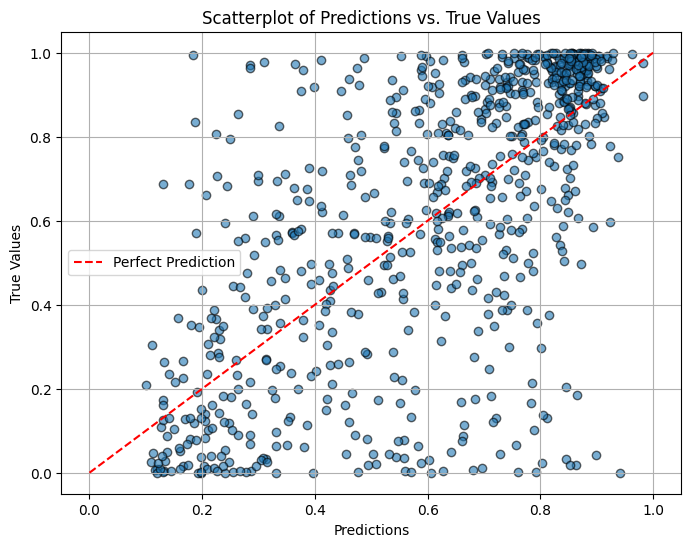

{'loss': 0.062345873564481735, 'mae': 0.1881796270608902}

In [32]:
metrics = linear_model_2.evaluate(x=X_test, y=y_test, return_dict=True)
scatter_predictions(linear_model_2)
metrics